# Melbourne Housing Datasets
Description: In this notebook, we are clustering Melbourne Housing Price dataset based on the Latitude, Longitude and Price.

- Jose Ramírez

# Importing Libraries

In [1]:
##### Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium # This library used for map.


# Loading Data

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv', index_col='Suburb')

# Exploratory Data Analysis (EDA)

In [3]:
df.head()

Address  Rooms Type      Price Method SellerG  \
Suburb                                                                 
Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

                  Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
Suburb                                                                          
Abbotsford  03-09-2016       2.5    3067.0       2.0       1.0  1.0     126.0   
Abbotsford  03-12-2016       2.5    3067.0       2.0       1.0  1.0     202.0   
Abbotsford  04-02-2016       2.5    3067.0       2.0       1.0  0.0     156.0   
Abbotsford  04-02-2016       2.5    3067.0       3.0       2.0  1.0       0.0   
Abbotsford  04-03-2017       2.5    3067.0       3.0       2.0  0.0     134.0   

            BuildingArea  YearBuilt         CouncilArea  Lattitude  \
Suburb                                                               
Abbotsford           NaN        NaN  Yarra City Council   -37.8014   
Abbotsford           NaN        NaN  Yarra City Council   -37.7996   
Abbotsford          79.0     1900.0  Yarra City Council   -37.8079   
Abbotsford           NaN        NaN  Yarra City Council   -37.8114   
Abbotsford         150.0     1900.0  Yarra City Council   -37.8093   

            Longtitude             Regionname  Propertycount  
Suburb                                                        
Abbotsford    144.9958  Northern Metropolitan         4019.0  
Abbotsford    144.9984  Northern Metropolitan         4019.0  
Abbotsford    144.9934  Northern Metropolitan         4019.0  
Abbotsford    145.0116  Northern Metropolitan         4019.0  
Abbotsford    144.9944  Northern Metropolitan         4019.0

In [5]:
df.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946     401.26706     37.328178   
min        0.000000      0.000000       0.000000       0.00000   1196.000000   
25%        1.000000      1.000000     224.000000     102.00000   1940.000000   
50%        2.000000      2.000000     521.000000     136.00000   1970.000000   
75%        2.000000      2.000000     670.000000     188.00000   2000.000000   
max       12.000000     26.000000  433014.000000   44515.00000   2106.000000   

          Lattitude    Longtitude  Propertycount  
count  26881.000000  26881.000000   34854.000000  
mean     -37.810634    145.001851    7572.888306  
std        0.090279      0.120169    4428.090313  
min      -38.190430    144.423790      83.000000  
25%      -37.862950    144.933500    4385.000000  
50%      -37.807600    145.007800    6763.000000  
75%      -37.754100    145.071900   10412.000000  
max      -37.390200    145.526350   21650.000000

In [4]:
df.isnull().sum().sort_values(ascending=False)

BuildingArea     21115
YearBuilt        19306
Landsize         11810
Car               8728
Bathroom          8226
Bedroom2          8217
Longtitude        7976
Lattitude         7976
Price             7610
Regionname           3
CouncilArea          3
Propertycount        3
Postcode             1
Distance             1
Rooms                0
Date                 0
SellerG              0
Method               0
Type                 0
Address              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34857 entries, Abbotsford to Yarraville
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        34857 non-null  object 
 1   Rooms          34857 non-null  int64  
 2   Type           34857 non-null  object 
 3   Price          27247 non-null  float64
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom2       26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13742 non-null  float64
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Lattitude      26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 1

# Data Clean up
Deleting all the null values in the dataset.

In [5]:
#dropping all the null values.
#We decided to drop all the null values since in this part we are not doing the descriptive part.
df = df.dropna()

In [6]:
# after dropping null values are now all 0
df.isnull().sum().sort_values(ascending=False)

Address          0
Rooms            0
Regionname       0
Longtitude       0
Lattitude        0
CouncilArea      0
YearBuilt        0
BuildingArea     0
Landsize         0
Car              0
Bathroom         0
Bedroom2         0
Postcode         0
Distance         0
Date             0
SellerG          0
Method           0
Price            0
Type             0
Propertycount    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8887 entries, Abbotsford to Yarraville
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        8887 non-null   object 
 1   Rooms          8887 non-null   int64  
 2   Type           8887 non-null   object 
 3   Price          8887 non-null   float64
 4   Method         8887 non-null   object 
 5   SellerG        8887 non-null   object 
 6   Date           8887 non-null   object 
 7   Distance       8887 non-null   float64
 8   Postcode       8887 non-null   float64
 9   Bedroom2       8887 non-null   float64
 10  Bathroom       8887 non-null   float64
 11  Car            8887 non-null   float64
 12  Landsize       8887 non-null   float64
 13  BuildingArea   8887 non-null   float64
 14  YearBuilt      8887 non-null   float64
 15  CouncilArea    8887 non-null   object 
 16  Lattitude      8887 non-null   float64
 17  Longtitude     8887 non-null   float64
 18

# Histogram
Let's now check the data distribution for each of the features.

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

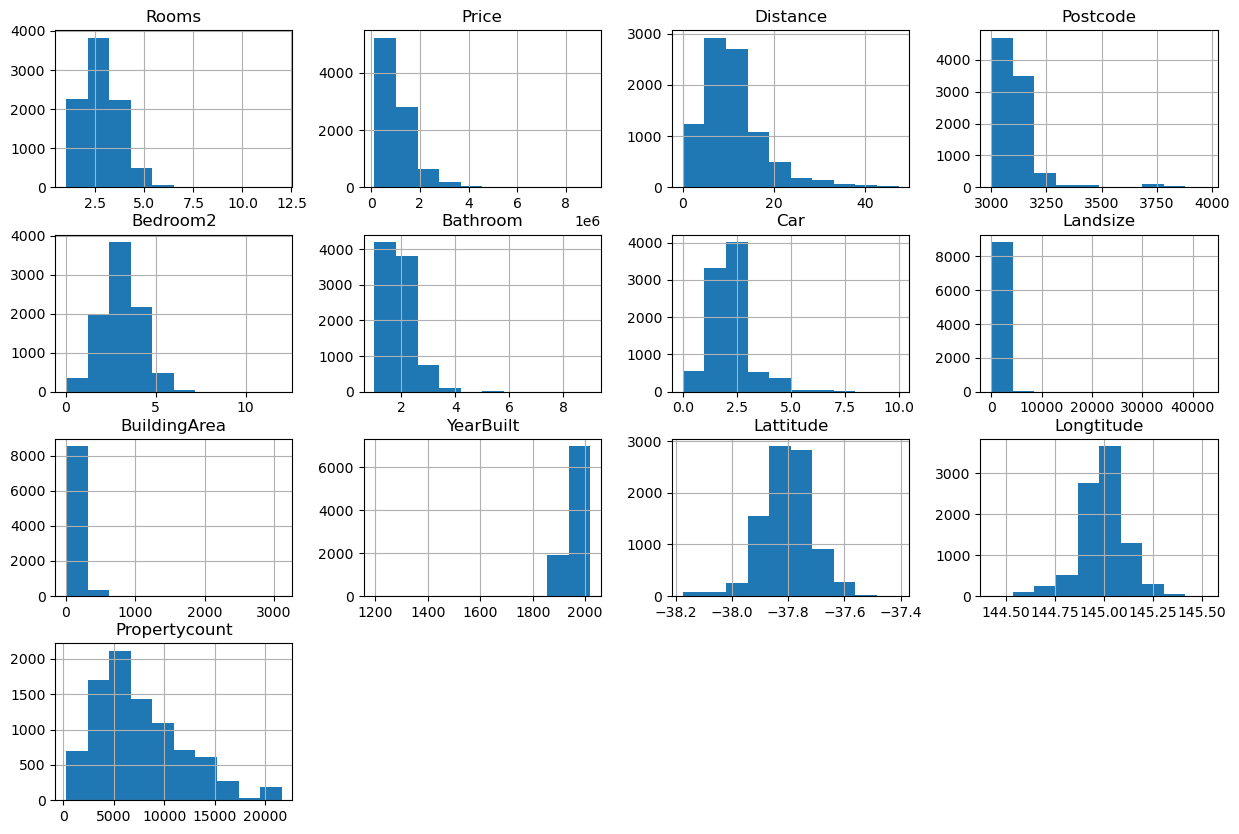

In [11]:
df.hist(figsize=(15, 10))

In [8]:
# Normalizing the features
df['Rooms'] = np.log(df['Rooms'] + 1)
df['YearBuilt'] = np.log(df['YearBuilt'] + 1)
df['Price'] = np.log(df['Price'] + 1)
df['Distance'] = np.log(df['Distance'] + 1)
df['Landsize'] = np.log(df['Landsize'] + 1)
df['BuildingArea'] = np.log(df['BuildingArea'] + 1)

#### Scatterplot for the coordinates
The scatter plot indicates that the suburbs of Docklands, Southbank, and CBD exhibit the highest housing prices.

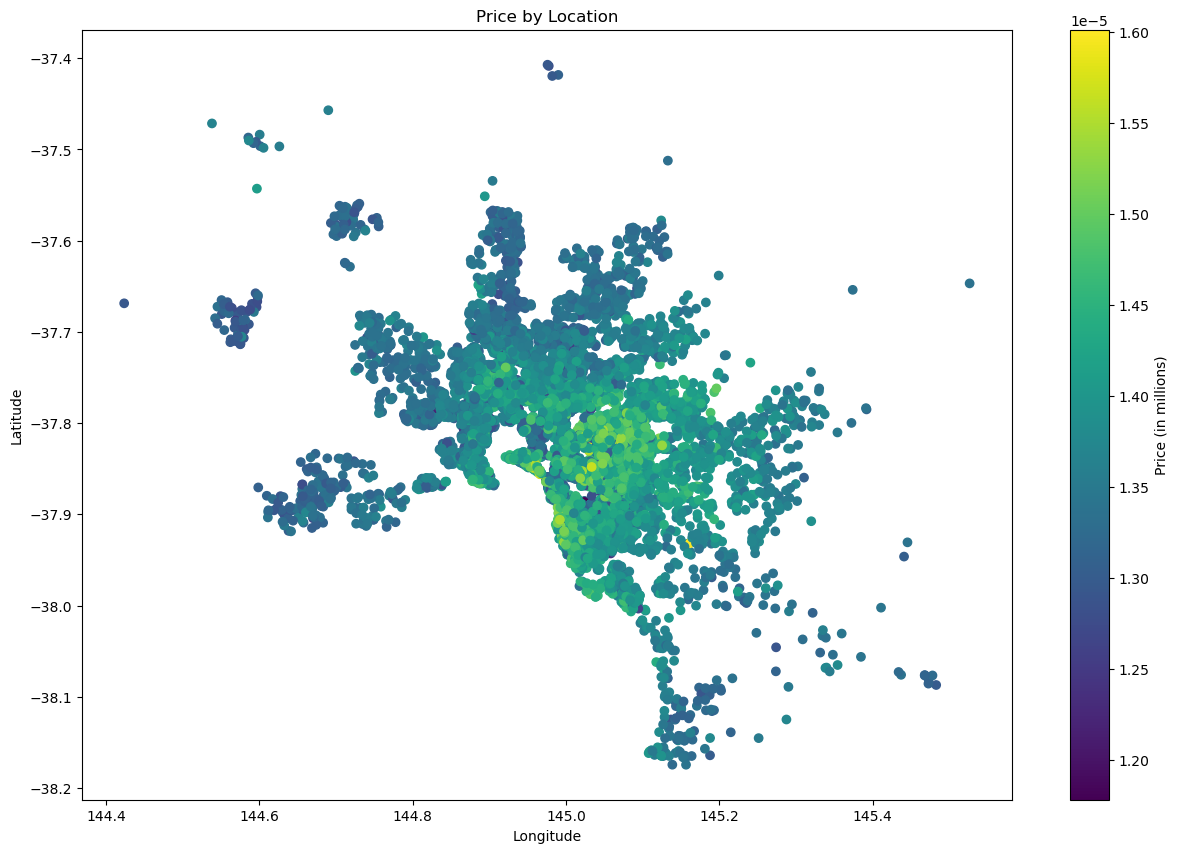

In [9]:
plt.figure(figsize=(15, 10))
plt.scatter(x=df['Longtitude'], y=df['Lattitude'], c=df['Price'] / 1_000_000)  # Dividing by 1,000,000 to show in millions
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price by Location')
plt.colorbar(label='Price (in millions)')
plt.show()

# Data Visualization

In [14]:
time_series = pd.read_csv('Melbourne_housing_FULL.csv', index_col='Suburb')

In [15]:
time_series = time_series.dropna()

In [16]:
# Convert YearBuilt to AgeBuilding
from datetime import datetime

current_year = datetime.now().year
time_series['AgeBuilding'] = current_year-time_series['YearBuilt'].astype(int)

In [17]:
time_series.head()

Address  Rooms Type      Price Method SellerG        Date  \
Suburb                                                                          
Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin  04-02-2016   
Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin  04-03-2017   
Abbotsford      55a Park St      4    h  1600000.0     VB  Nelson  04-06-2016   
Abbotsford     124 Yarra St      3    h  1876000.0      S  Nelson  07-05-2016   
Abbotsford    98 Charles St      2    h  1636000.0      S  Nelson  08-10-2016   

            Distance  Postcode  Bedroom2  ...  Car  Landsize  BuildingArea  \
Suburb                                    ...                                
Abbotsford       2.5    3067.0       2.0  ...  0.0     156.0          79.0   
Abbotsford       2.5    3067.0       3.0  ...  0.0     134.0         150.0   
Abbotsford       2.5    3067.0       3.0  ...  2.0     120.0         142.0   
Abbotsford       2.5    3067.0       4.0  ...  0.0     245.0         210.0   
Abbotsford       2.5    3067.0       2.0  ...  2.0     256.0         107.0   

            YearBuilt         CouncilArea Lattitude  Longtitude  \
Suburb                                                            
Abbotsford     1900.0  Yarra City Council  -37.8079    144.9934   
Abbotsford     1900.0  Yarra City Council  -37.8093    144.9944   
Abbotsford     2014.0  Yarra City Council  -37.8072    144.9941   
Abbotsford     1910.0  Yarra City Council  -37.8024    144.9993   
Abbotsford     1890.0  Yarra City Council  -37.8060    144.9954   

                       Regionname Propertycount  AgeBuilding  
Suburb                                                        
Abbotsford  Northern Metropolitan        4019.0          123  
Abbotsford  Northern Metropolitan        4019.0          123  
Abbotsford  Northern Metropolitan        4019.0            9  
Abbotsford  Northern Metropolitan        4019.0          113  
Abbotsford  Northern Metropolitan        4019.0          133  

[5 rows x 21 columns]

Putting age building into bins.

In [18]:
age_building_description = time_series['AgeBuilding'].describe()
print(age_building_description)

count    8887.000000
mean       57.246652
std        37.040876
min         4.000000
25%        23.000000
50%        53.000000
75%        78.000000
max       827.000000
Name: AgeBuilding, dtype: float64


In [19]:
bins = [0, 23, 53, 78, float('inf')]  # Define the bin edges
labels = ['New', 'Moderate', 'Old', 'Very Old']  # Labels for each bin

# Create a new column 'AgeGroup' based on the defined bins
time_series['AgeGroup'] = pd.cut(time_series['AgeBuilding'], bins=bins, labels=labels, right=False)

# Check the distribution of buildings in each age group
age_group_counts = time_series['AgeGroup'].value_counts()
print(age_group_counts)

AgeGroup
Old         2720
Very Old    2227
Moderate    1989
New         1951
Name: count, dtype: int64


# Average Price by Age of Building Group
This graph is to check if there is a pattern that we can see based on the age of the building.

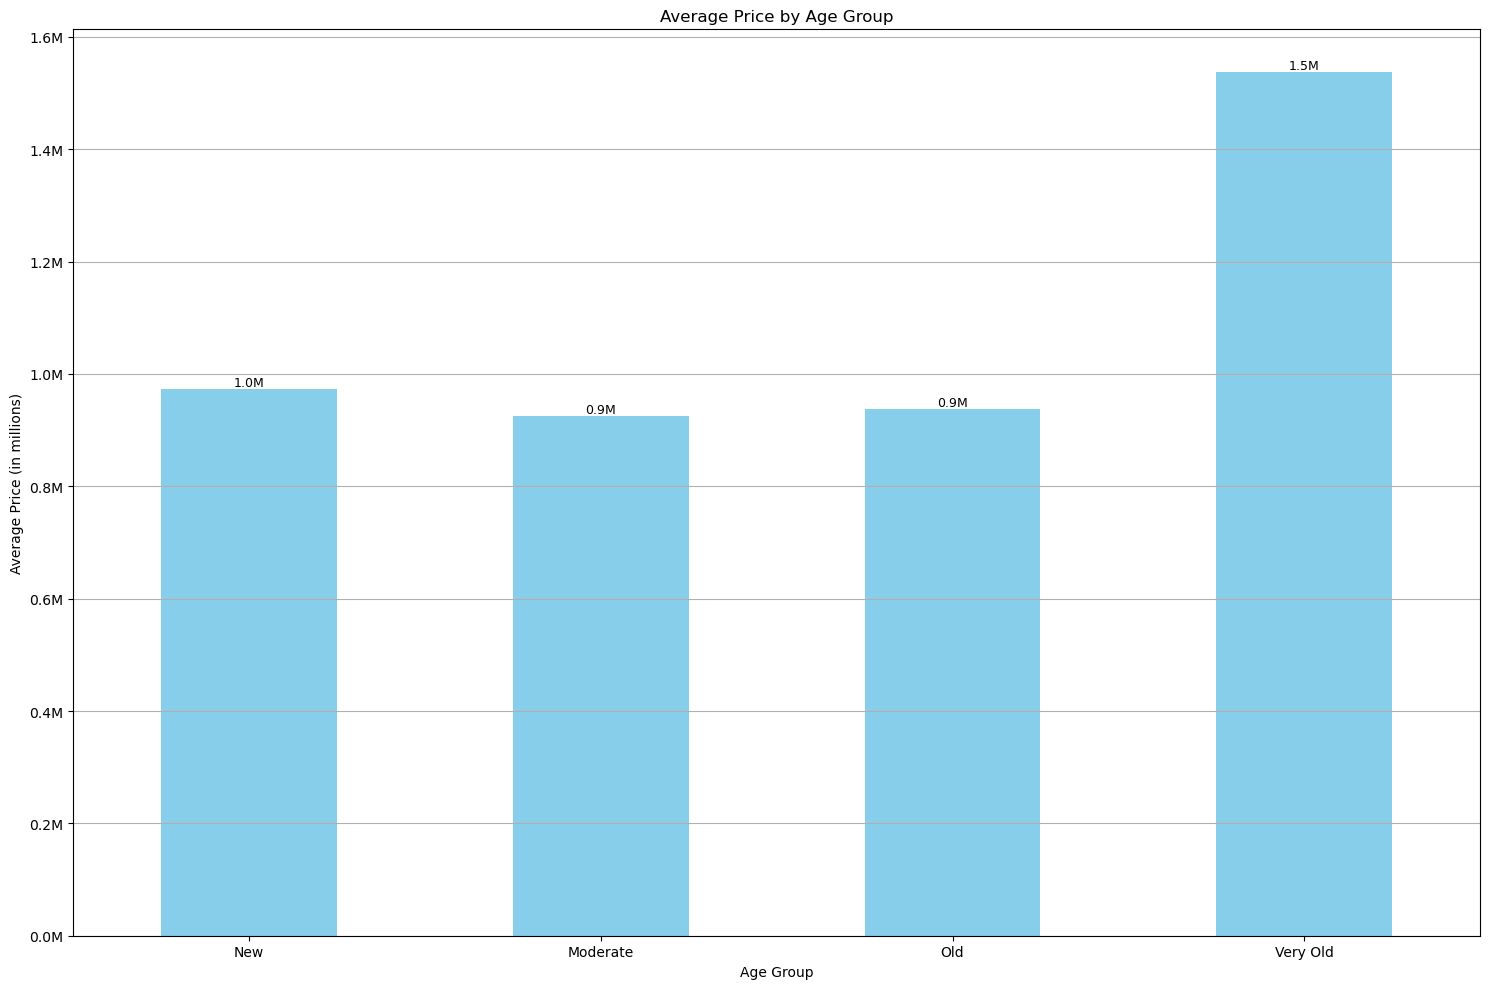

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Calculate the average price for each AgeGroup
avg_price_by_age_group = time_series.groupby('AgeGroup')['Price'].mean()

# Function to format y-axis ticks in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

# Plotting the bar graph
plt.figure(figsize=(15, 10))
bar_plot = avg_price_by_age_group.plot(kind='bar', color='skyblue')

plt.title('Average Price by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Price (in millions)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Apply formatter to y-axis
formatter = FuncFormatter(millions_formatter)
bar_plot.yaxis.set_major_formatter(formatter)

for i, val in enumerate(avg_price_by_age_group):
    plt.text(i, val, f'{val / 1e6:.1f}M', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Bar Graph by Top 5 Sellers

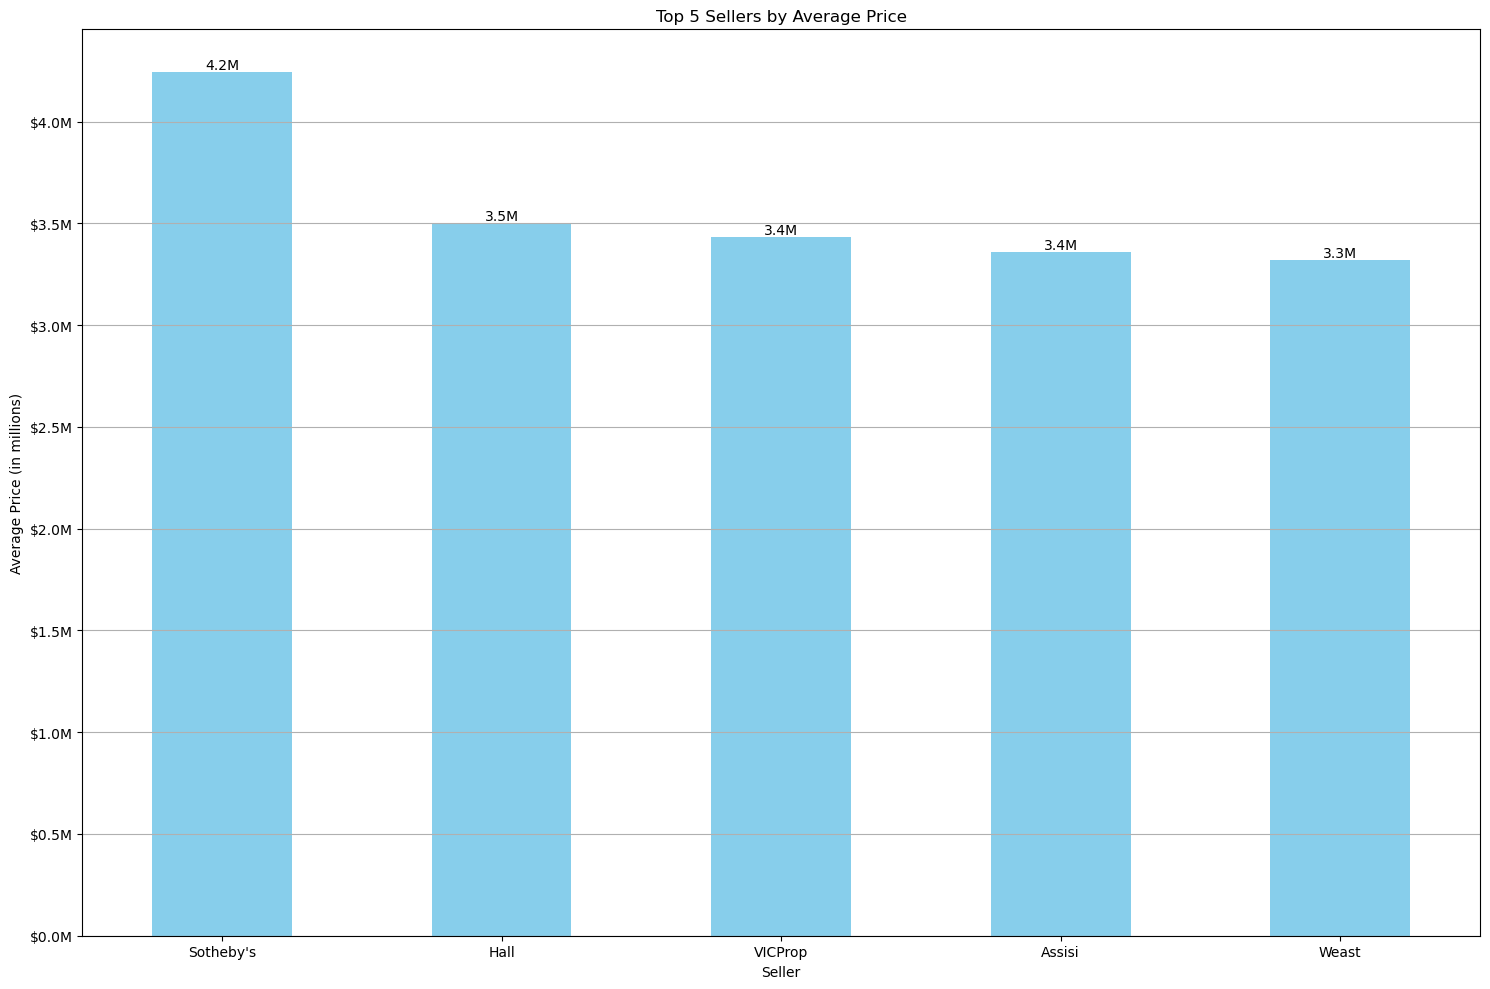

In [21]:
seller_price = time_series.groupby('SellerG')['Price'].mean().sort_values(ascending=False)

# Get the top 5 sellers
top_sellers = seller_price.head(5)

# Function to format y-axis in millions
def millions_formatter(x, pos):
    return f'${x / 1e6:.1f}M'

# Plotting the bar graph
plt.figure(figsize=(15, 10))
bar_plot = top_sellers.plot(kind='bar', color='skyblue')

plt.title('Top 5 Sellers by Average Price')
plt.xlabel('Seller')
plt.ylabel('Average Price (in millions)')
plt.xticks(rotation=0) 

# Apply formatter to y-axis
formatter = FuncFormatter(millions_formatter)
bar_plot.yaxis.set_major_formatter(formatter)

# Adding data labels to the bars
for index, value in enumerate(top_sellers):
    plt.text(index, value, f'{value / 1e6:.1f}M', ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Seasonal Average Housing Price in Melbourne, Australia
This grpah is to check if we can see patterns that can affect the housing price based on season.

In [22]:
# In this code we will take the month from the Date (date of pruchased) column and put into season bins.

# Convert 'Date' column to datetime specifying day-month-year format
time_series['Date'] = pd.to_datetime(time_series['Date'], format="%d-%m-%Y")

# Define Melbourne's seasons based on months
def get_season_melbourne(month):
    if month in [12, 1, 2]:  # Dec, Jan, Feb => Summer
        return 'Summer'
    elif month in [3, 4, 5]:  # Mar, Apr, May => Autumn
        return 'Autumn'
    elif month in [6, 7, 8]:  # Jun, Jul, Aug => Winter
        return 'Winter'
    else:  # Sep, Oct, Nov => Spring
        return 'Spring'

# Extract month from the 'Date' column and apply the get_season_melbourne function
time_series['Month'] = time_series['Date'].dt.month
time_series['Season_Melbourne'] = time_series['Month'].apply(get_season_melbourne)


In [23]:
time_series.head()

Address  Rooms Type      Price Method SellerG       Date  \
Suburb                                                                         
Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin 2016-02-04   
Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin 2017-03-04   
Abbotsford      55a Park St      4    h  1600000.0     VB  Nelson 2016-06-04   
Abbotsford     124 Yarra St      3    h  1876000.0      S  Nelson 2016-05-07   
Abbotsford    98 Charles St      2    h  1636000.0      S  Nelson 2016-10-08   

            Distance  Postcode  Bedroom2  ...  YearBuilt         CouncilArea  \
Suburb                                    ...                                  
Abbotsford       2.5    3067.0       2.0  ...     1900.0  Yarra City Council   
Abbotsford       2.5    3067.0       3.0  ...     1900.0  Yarra City Council   
Abbotsford       2.5    3067.0       3.0  ...     2014.0  Yarra City Council   
Abbotsford       2.5    3067.0       4.0  ...     1910.0  Yarra City Council   
Abbotsford       2.5    3067.0       2.0  ...     1890.0  Yarra City Council   

            Lattitude  Longtitude             Regionname Propertycount  \
Suburb                                                                   
Abbotsford   -37.8079    144.9934  Northern Metropolitan        4019.0   
Abbotsford   -37.8093    144.9944  Northern Metropolitan        4019.0   
Abbotsford   -37.8072    144.9941  Northern Metropolitan        4019.0   
Abbotsford   -37.8024    144.9993  Northern Metropolitan        4019.0   
Abbotsford   -37.8060    144.9954  Northern Metropolitan        4019.0   

            AgeBuilding  AgeGroup Month  Season_Melbourne  
Suburb                                                     
Abbotsford          123  Very Old     2            Summer  
Abbotsford          123  Very Old     3            Autumn  
Abbotsford            9       New     6            Winter  
Abbotsford          113  Very Old     5            Autumn  
Abbotsford          133  Very Old    10            Spring  

[5 rows x 24 columns]

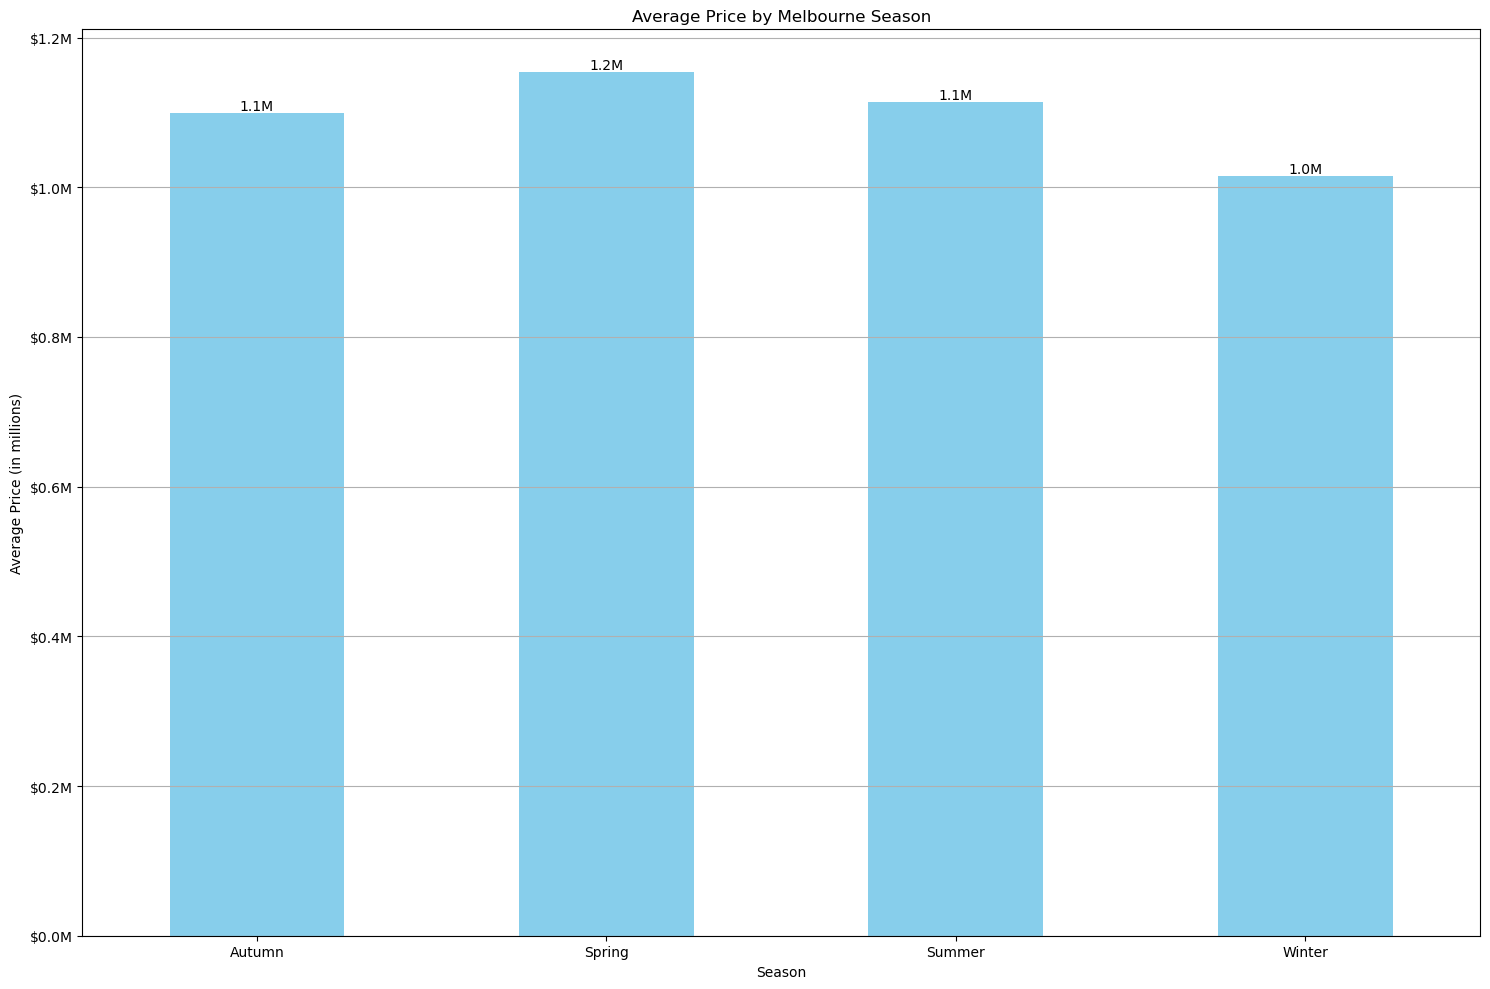

In [24]:
# Calculate the average price for each season
seasonal_avg_price = time_series.groupby('Season_Melbourne')['Price'].mean()

# Function to format y-axis ticks in millions
def millions_formatter(x, pos):
    return f'${x / 1e6:.1f}M'

# Plotting the bar graph for average price by season
plt.figure(figsize=(15, 10))
bar_plot = seasonal_avg_price.plot(kind='bar', color='skyblue')

plt.title('Average Price by Melbourne Season')
plt.xlabel('Season')
plt.ylabel('Average Price (in millions)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Apply formatter to y-axis ticks
formatter = FuncFormatter(millions_formatter)
bar_plot.yaxis.set_major_formatter(formatter)

# Adding data labels to the bars
for index, value in enumerate(seasonal_avg_price):
    plt.text(index, value, f'{value / 1e6:.1f}M', ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Quarterly Average Housing Price in Melbourne, Australia
This lines graph shows us the trend of the housing price on a quarterly basis.

In [25]:
from matplotlib.ticker import FuncFormatter

# Extract the quarter and year from the 'Date' column
time_series['Quarter'] = time_series['Date'].dt.to_period('Q')  # Extract quarter using t_period
time_series['Year'] = time_series['Date'].dt.year  # Extract year

# Calculate the quarterly average price and creating new dataframe quarterly_avg_price
quarterly_avg_price = time_series.groupby(['Year', 'Quarter'])['Price'].mean().reset_index()

# Combine Year and Quarter into a single string for X-axis labels 
quarterly_avg_price['YearQuarter'] = quarterly_avg_price.apply(lambda x: f"Q{x['Quarter'].quarter} {x['Year']}", axis=1)



In [26]:
print(time_series.columns)

Index(['Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'AgeBuilding', 'AgeGroup', 'Month',
       'Season_Melbourne', 'Quarter', 'Year'],
      dtype='object')


In [27]:
print(quarterly_avg_price['YearQuarter'])

0    Q1 2016
1    Q2 2016
2    Q3 2016
3    Q4 2016
4    Q1 2017
5    Q2 2017
6    Q3 2017
7    Q4 2017
8    Q1 2018
Name: YearQuarter, dtype: object


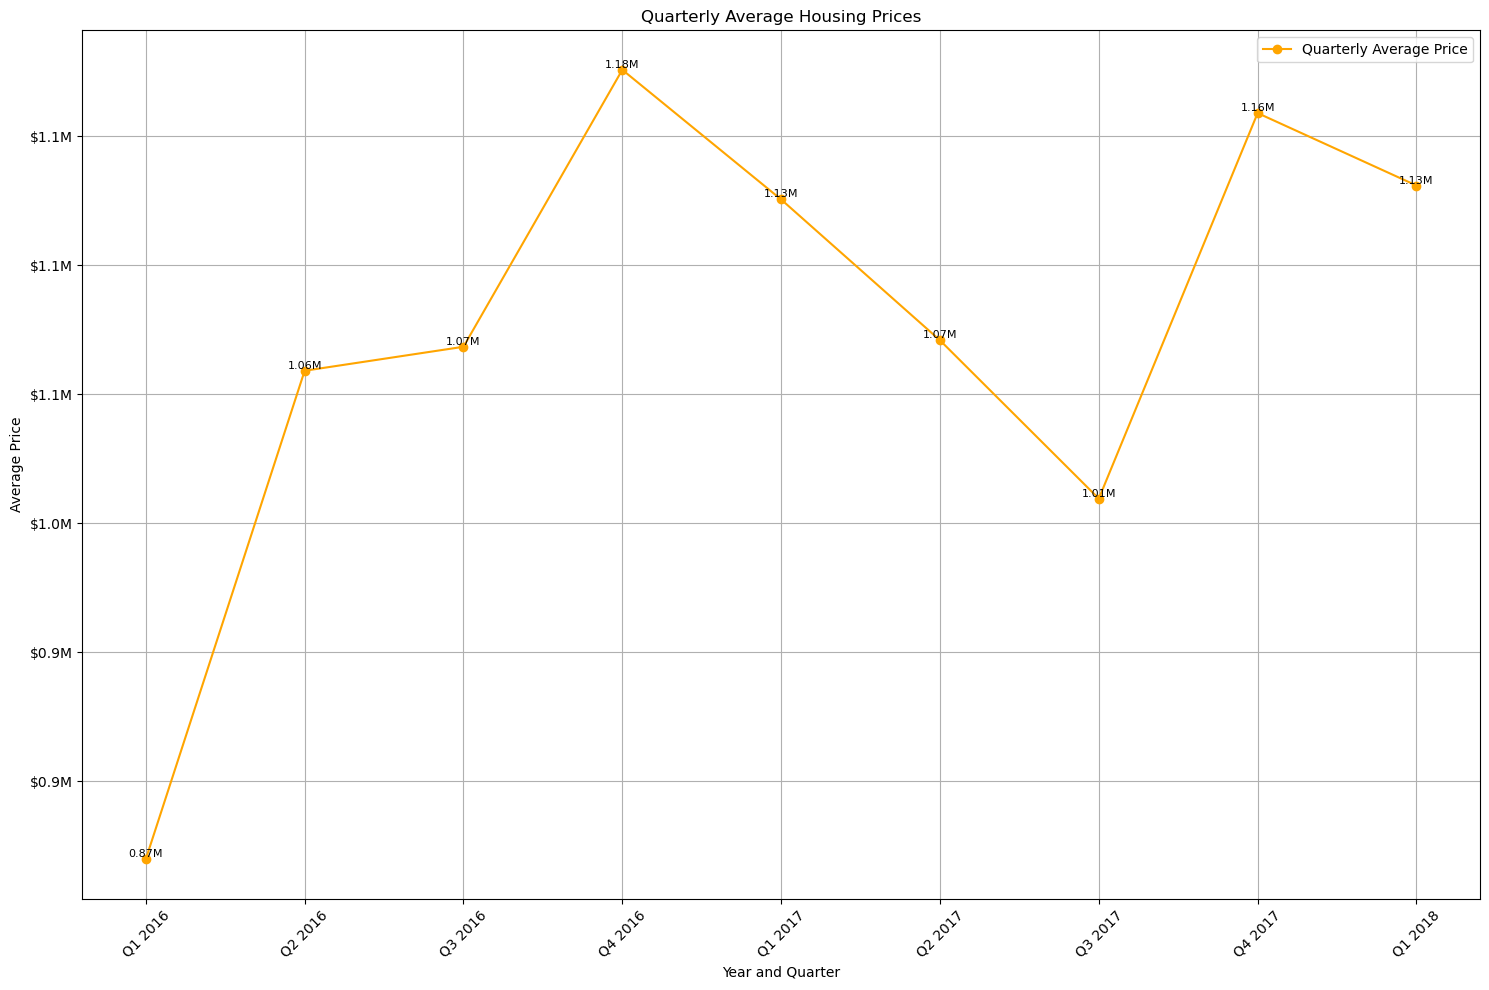

In [28]:
# Function to format y-axis ticks in millions
def millions_formatter(x, pos):
    return f'${x / 1e6:.1f}M'

# Plotting the quarterly average price with data labels in millions
plt.figure(figsize=(15, 10))
plt.plot(range(len(quarterly_avg_price)), quarterly_avg_price['Price'], marker='o', color='orange', label='Quarterly Average Price')

plt.title('Quarterly Average Housing Prices')
plt.xlabel('Year and Quarter')
plt.ylabel('Average Price')
plt.grid(True)

# Adding data labels to the line plot (in millions)
for i, row in quarterly_avg_price.iterrows():
    plt.text(i, row['Price'], f'{row["Price"] / 1e6:.2f}M', ha='center', va='bottom', fontsize=8)

# Set X-axis labels by Quarter and Year from dataframe created (quarterly_avg_price)
plt.xticks(range(len(quarterly_avg_price)), quarterly_avg_price['YearQuarter'], rotation=45)

# Apply formatter to y-axis ticks
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()
plt.tight_layout()
plt.show()

In [29]:
print(time_series.columns)

Index(['Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'AgeBuilding', 'AgeGroup', 'Month',
       'Season_Melbourne', 'Quarter', 'Year'],
      dtype='object')


In [30]:
unique_categories = df['Regionname'].unique()
print("Unique categories:", unique_categories)

Unique categories: ['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Northern Victoria'
 'Eastern Victoria' 'Western Victoria']


# Average Price by Region
This graph gives us a view of which region has the higher housing price.

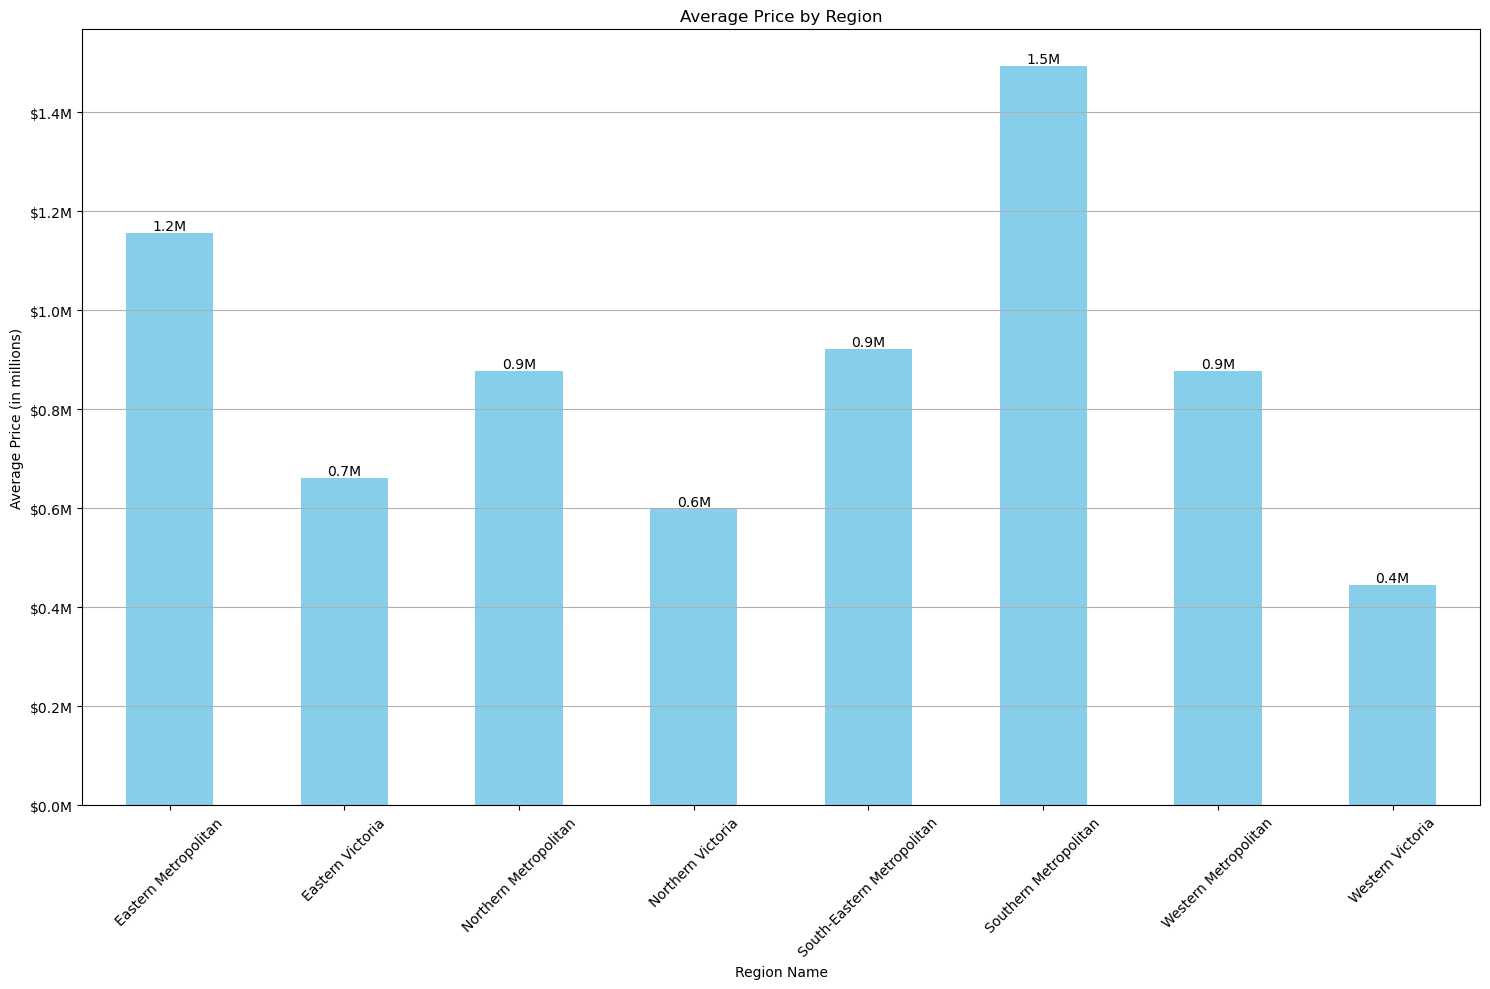

In [31]:
region_avg_price = time_series.groupby('Regionname')['Price'].mean()

# Function to format y-axis ticks in millions
def millions_formatter(x, pos):
    return f'${x / 1e6:.1f}M'

# Plotting the bar graph for average price by season
plt.figure(figsize=(15, 10))
bar_plot = region_avg_price.plot(kind='bar', color='skyblue')

plt.title('Average Price by Region')
plt.xlabel('Region Name')
plt.ylabel('Average Price (in millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Apply formatter to y-axis ticks
formatter = FuncFormatter(millions_formatter)
bar_plot.yaxis.set_major_formatter(formatter)

# Adding data labels to the bars
for index, value in enumerate(region_avg_price):
    plt.text(index, value, f'{value / 1e6:.1f}M', ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# KMeans Clustering


First, we need to identify the cluster we can use by using the elbow method.

In [10]:
#importing KMeans libraries
from sklearn.cluster import KMeans


In [33]:
#setting inital cluster=3
kmeans = KMeans(n_clusters = 3, random_state = 42, n_init='auto')

#using fit_predict to cluster based on Longtitude, Lattitude and Price
cluster_labels = kmeans.fit_predict(df[['Longtitude', 'Lattitude', 'Price']])

#Then adding back the cluster column to data frame.
df['Cluster'] = cluster_labels

print(df.head())


                    Address     Rooms Type      Price Method SellerG  \
Suburb                                                                 
Abbotsford  25 Bloomburg St  1.098612    h  13.849913      S  Biggin   
Abbotsford     5 Charles St  1.386294    h  14.197366     SP  Biggin   
Abbotsford      55a Park St  1.609438    h  14.285515     VB  Nelson   
Abbotsford     124 Yarra St  1.386294    h  14.444653      S  Nelson   
Abbotsford    98 Charles St  1.098612    h  14.307765      S  Nelson   

                  Date  Distance  Postcode  Bedroom2  ...  Car  Landsize  \
Suburb                                                ...                  
Abbotsford  04-02-2016  1.252763    3067.0       2.0  ...  0.0  5.056246   
Abbotsford  04-03-2017  1.252763    3067.0       3.0  ...  0.0  4.905275   
Abbotsford  04-06-2016  1.252763    3067.0       3.0  ...  2.0  4.795791   
Abbotsford  07-05-2016  1.252763    3067.0       4.0  ...  0.0  5.505332   
Abbotsford  08-10-2016  1.252763    306

In [11]:
#Defining the K range from 1-10 and finding 
#the sum squared of error based on 3 variables.
k_rng = range(1,10)
sse = []
for k in k_rng: 
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['Longtitude', 'Lattitude', 'Price']])   # fit the model and predict the cluster labels for each data point based on the features provided ('Longitude', 'Latitude', and 'Price').
    sse.append(km.inertia_)

c:\Users\charl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\charl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\charl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\charl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Plotting Sum Squared Error which identifies the "elbow"

In [12]:
sse

[2740.1243242840396,
 1056.9305930384419,
 657.4915270632591,
 469.52087055540153,
 378.8503151699575,
 322.4648305106169,
 288.8848375270238,
 257.6018861219568,
 236.16190721427938]

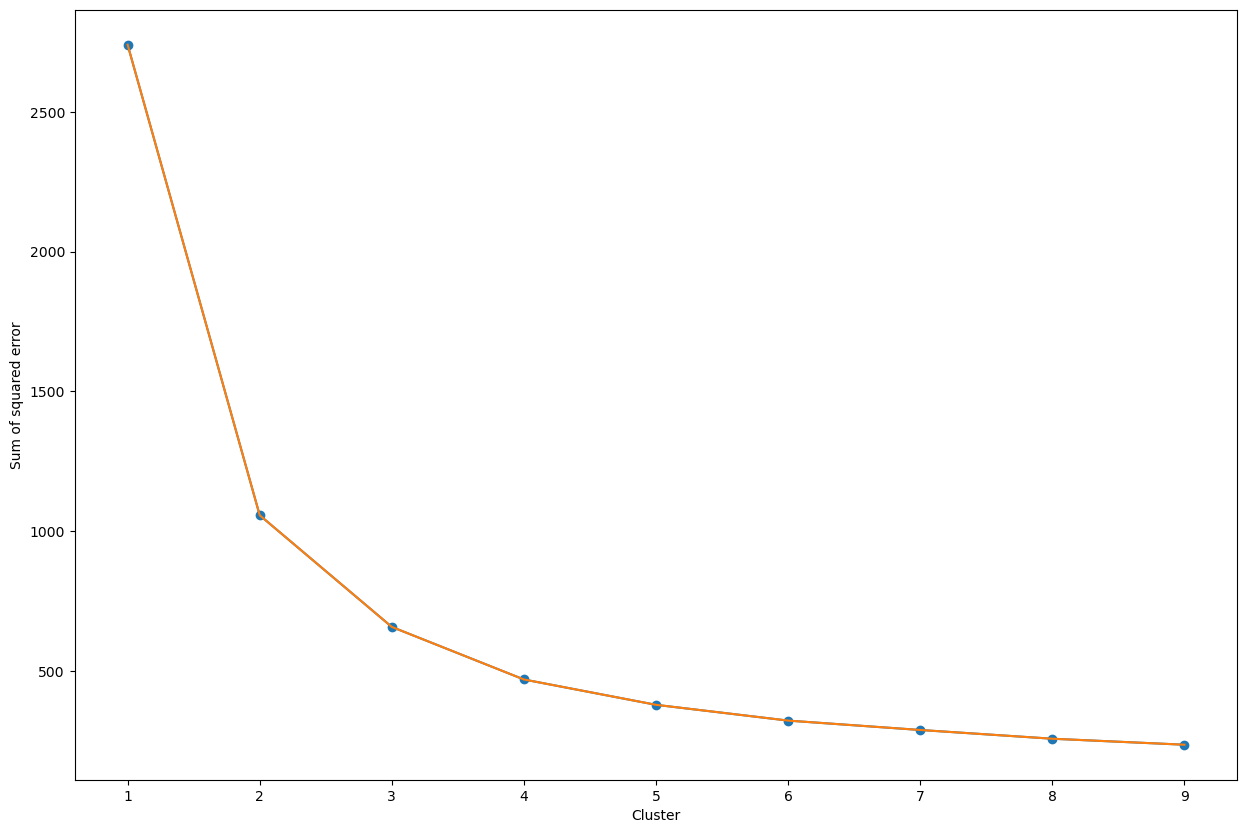

In [13]:
#plotting K means vs SSE to visualize the elbow
plt.figure(figsize=(15, 10))

plt.plot(k_rng, sse, marker='o')
plt.xlabel('Cluster')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Second, we are taking the silhouette_score against the number of clusters.

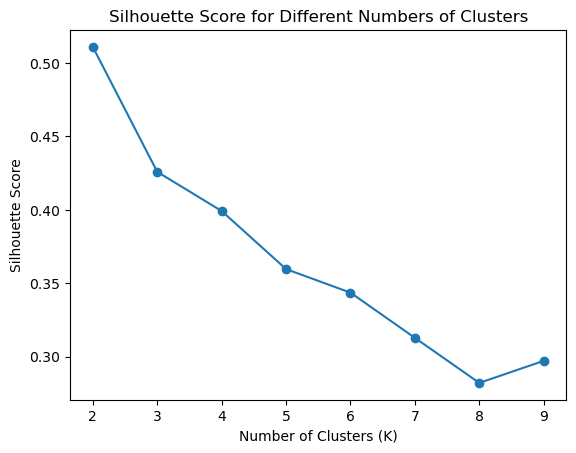

In [14]:
from sklearn.metrics import silhouette_score

K = range(2, 10)
fits = []
scores = []

for k in K:
    # Train the model for the current value of k on the specified columns
    model = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(df[['Longtitude', 'Lattitude', 'Price']])
    
    # Append the model to fits
    fits.append(model)
    
    # Calculate the silhouette score for the current model's labels
    silhouette = silhouette_score(df[['Longtitude', 'Lattitude', 'Price']], model.labels_, metric='euclidean')
    
    # Append the silhouette score to scores
    scores.append(silhouette)

# Plotting the silhouette scores against the number of clusters (K)
plt.plot(K, scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

In [19]:
import folium

# Assuming approximate coordinates for the center of Australia
australia_coords = [-25.2744, 133.7751]  # Update with accurate coordinates if needed

# Create the map centered on Australia
map = folium.Map(location=australia_coords, zoom_start=4)

colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
          'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
          'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray',
          'black', 'lightgray', 'red', 'blue', 'green', 'purple',
          'orange', 'darkred', 'lightred', 'beige', 'darkblue',
          'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue',
          'lightgreen', 'gray', 'black', 'lightgray']

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Lattitude"], row["Longtitude"]],  # Corrected column names
        radius=12,
        weight=2,
        fill=True,
        fill_color=colors[int(row["Cluster"])],
        color=colors[int(row["Cluster"])]
    ).add_to(map)

map


# Plotting the clusters without scaling the data

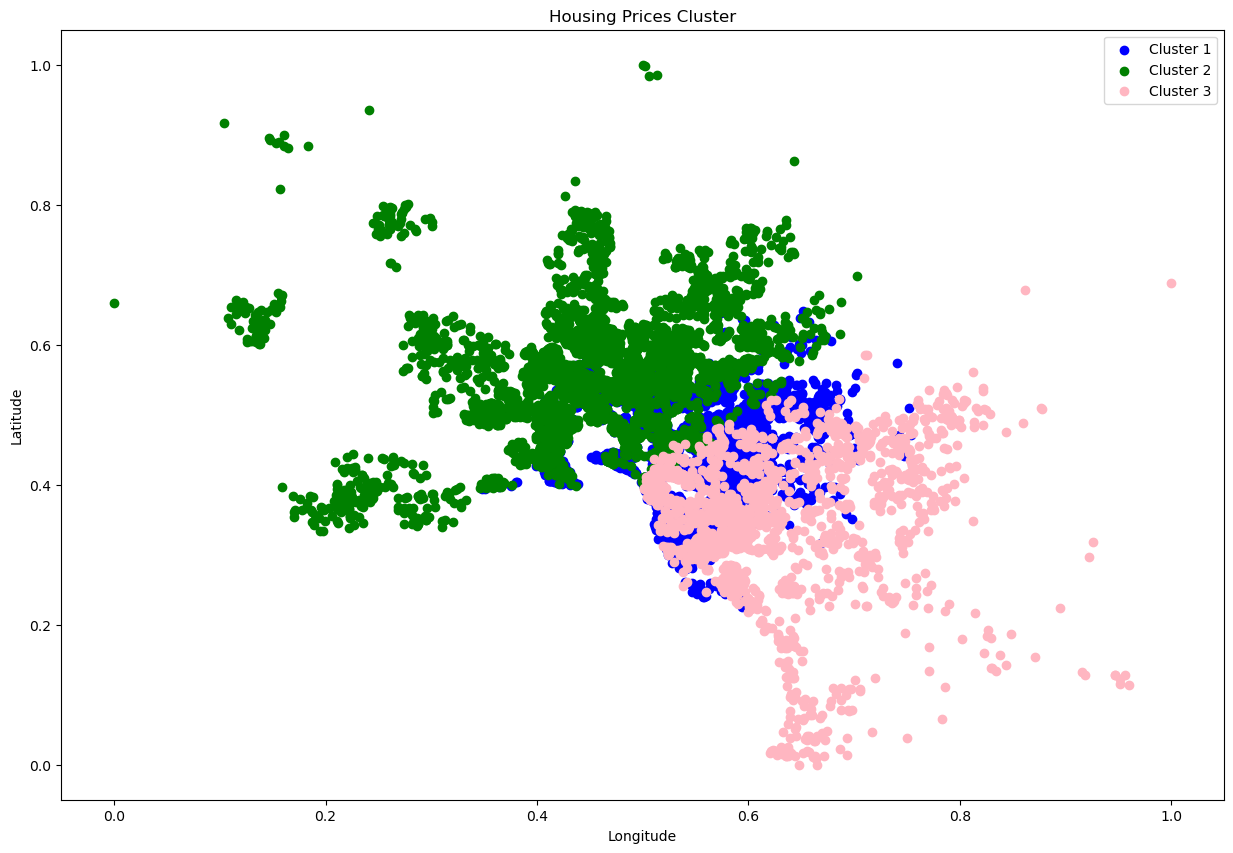

In [54]:
#Scatter Plot of Longitude and Latitude
plt.figure(figsize=(15, 10))

df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1['Longtitude'], df1['Lattitude'], c='blue', label='Cluster 1')
plt.scatter(df2['Longtitude'], df2['Lattitude'], c='green', label='Cluster 2')
plt.scatter(df3['Longtitude'], df3['Lattitude'], c='lightpink', label='Cluster 3')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Prices Cluster')
plt.legend()
plt.show()

# Plotting the clusters WITH scaling the data using MinMaxScaler

In [80]:
#Since this is a geographic coordinates we used MinMaxScaler to preserve their original relationships and maintain distances between points on the Earth's surface.
from sklearn.preprocessing import MinMaxScaler

#Initiate MinMaxScaler
scaler = MinMaxScaler()

#Scale Longitude, Latitude, and Price columns
df[['Longtitude', 'Lattitude', 'Price']] = scaler.fit_transform(df[['Longtitude', 'Lattitude', 'Price']])

In [41]:
#Let's do the KMeans again with the new scaled data
KMeans(n_clusters = 3, random_state = 42, n_init='auto', init='random', max_iter=300)
cluster_labels = kmeans.fit_predict(df[['Longtitude', 'Lattitude', 'Price']])
df['Cluster'] = cluster_labels
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [42]:
#This define the centers (centroids)
kmeans.cluster_centers_

array([[0.53989388, 0.45591854, 0.60443992],
       [0.4520081 , 0.55555504, 0.38244383],
       [0.62365637, 0.34938582, 0.42945163]])

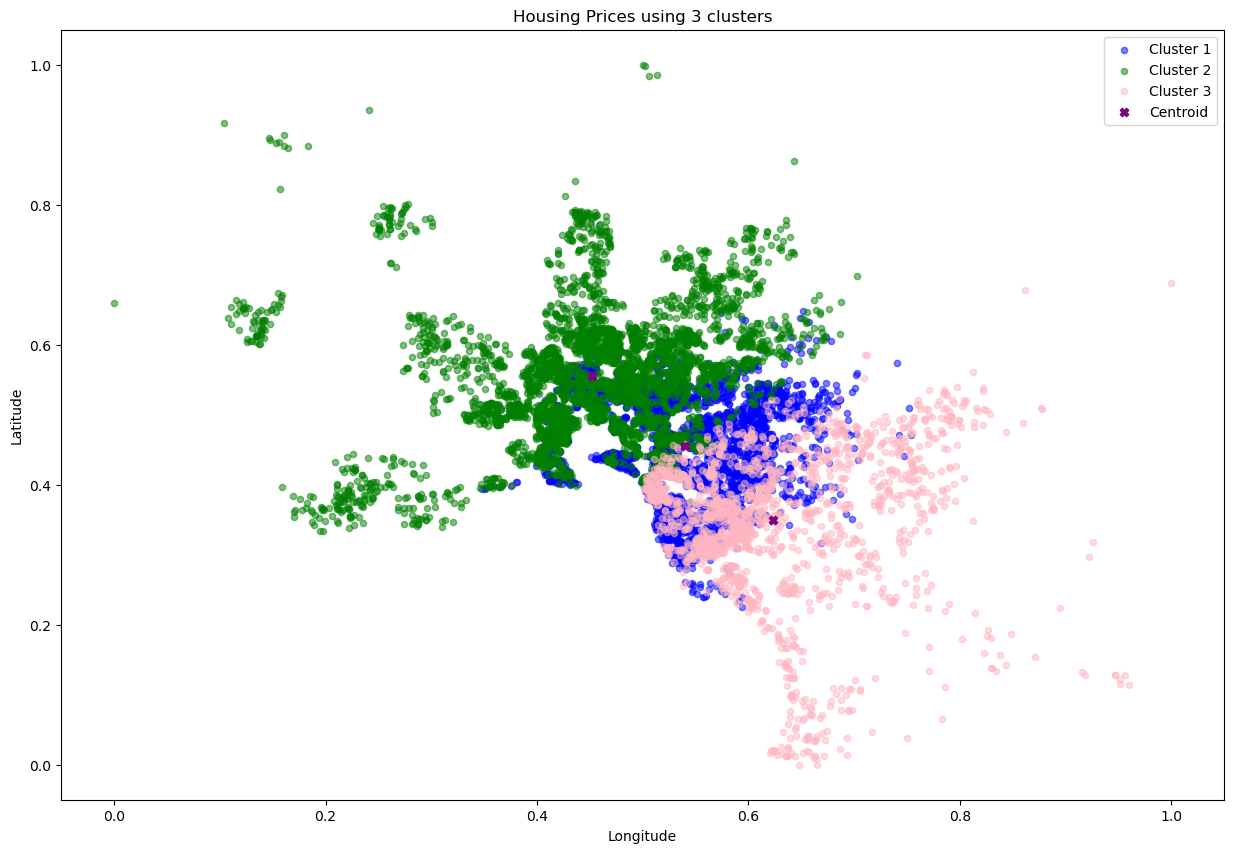

In [55]:
#We can see that even after scaling both Longtitude and Lattitude it still preserves the points
plt.figure(figsize=(15, 10))

df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1['Longtitude'], df1['Lattitude'], c='blue', label='Cluster 1', alpha=0.5, s=20)
plt.scatter(df2['Longtitude'], df2['Lattitude'], c='green', label='Cluster 2', alpha=0.5, s=20)
plt.scatter(df3['Longtitude'], df3['Lattitude'], c='lightpink', label='Cluster 3', alpha=0.5, s=20)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='purple', marker='X', label='Centroid')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Prices using 3 clusters')
plt.legend()
plt.show()

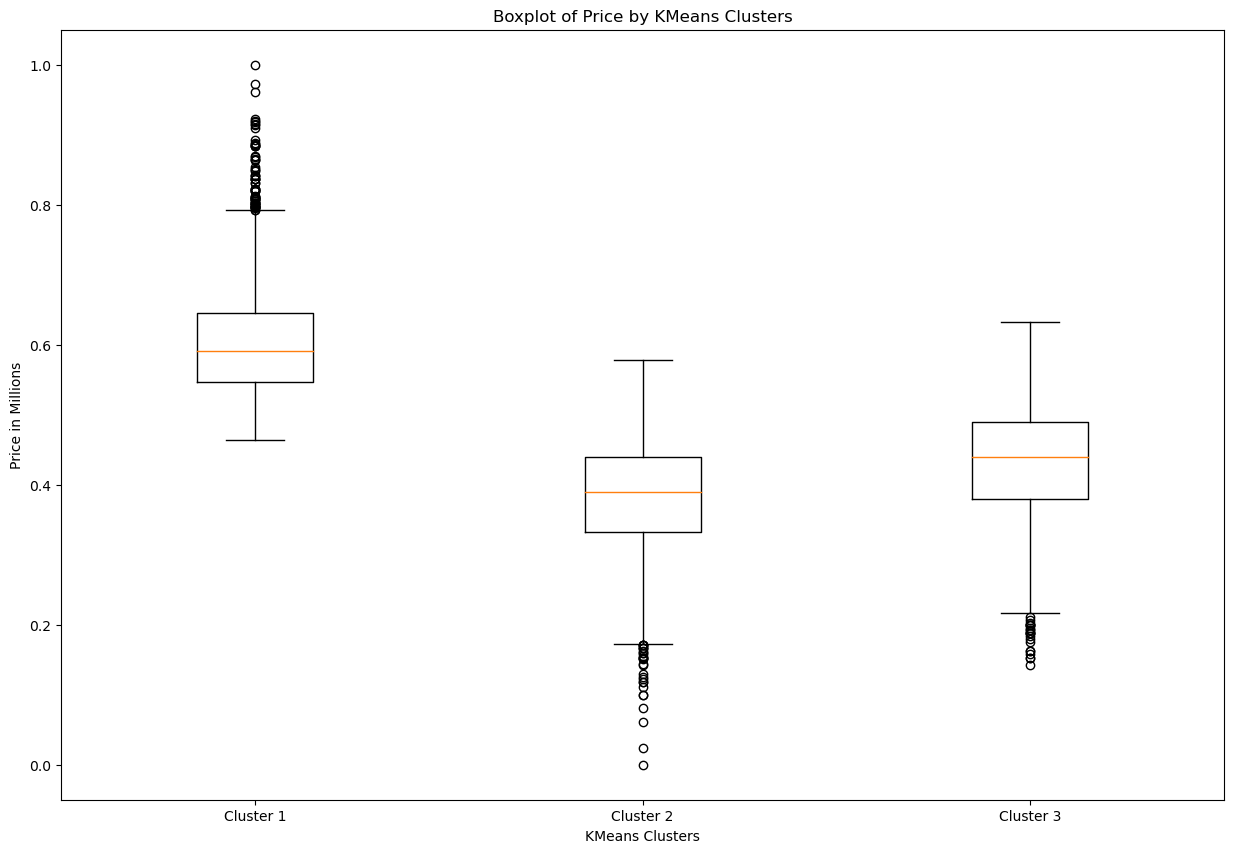

In [56]:
df['Price_Millions'] = df['Price'] / 1e6  # Dividing by 1 million to convert to millions

plt.figure(figsize=(15, 10))
plt.boxplot([df[df['Cluster'] == i]['Price'] for i in range(3)], labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.xlabel('KMeans Clusters')
plt.ylabel('Price in Millions')
plt.title('Boxplot of Price by KMeans Clusters')
plt.show()

Calculating Silhouette Score using Cluster = 3

In [45]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# First KMeans with n_clusters=3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init='auto', init='random', max_iter=300)
cluster_labels_3 = kmeans_3.fit_predict(df[['Longtitude', 'Lattitude', 'Price']])

# Compute silhouette score for n_clusters=3
silhouette_avg_3 = silhouette_score(df[['Longtitude', 'Lattitude', 'Price']], cluster_labels_3)
print(f"Silhouette Score for KMeans with n_clusters=3: {silhouette_avg_3}")

Silhouette Score for KMeans with n_clusters=3: 0.3104569587659288


# Using Cluster = 4

In [98]:
df.drop('Cluster', axis=1, inplace=True)

In [99]:
print(df.columns)

Index(['Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')


In [16]:
from sklearn.cluster import KMeans

# Create a KMeans object with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto', init='random', max_iter=300)

# Fit the KMeans model on Longitude, Latitude and Price
kmeans.fit(df[['Longtitude', 'Lattitude', 'Price']])

# Predict cluster labels
cluster_labels = kmeans.predict(df[['Longtitude', 'Lattitude', 'Price']])

# Assign the cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Display or return the cluster labels
print(cluster_labels)

[1 1 1 ... 3 3 3]


In [17]:
print(df.columns)

Index(['Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Cluster'],
      dtype='object')


In [18]:
print(df['Cluster'].value_counts())

Cluster
3    3240
1    2512
2    2023
0    1112
Name: count, dtype: int64


In [103]:
#This define the centers (centroids)
kmeans.cluster_centers_

array([[0.38482864, 0.50770165, 0.07624343],
       [0.60914326, 0.35626199, 0.09221471],
       [0.51829763, 0.58878872, 0.075443  ],
       [0.55272424, 0.44886969, 0.22231307]])

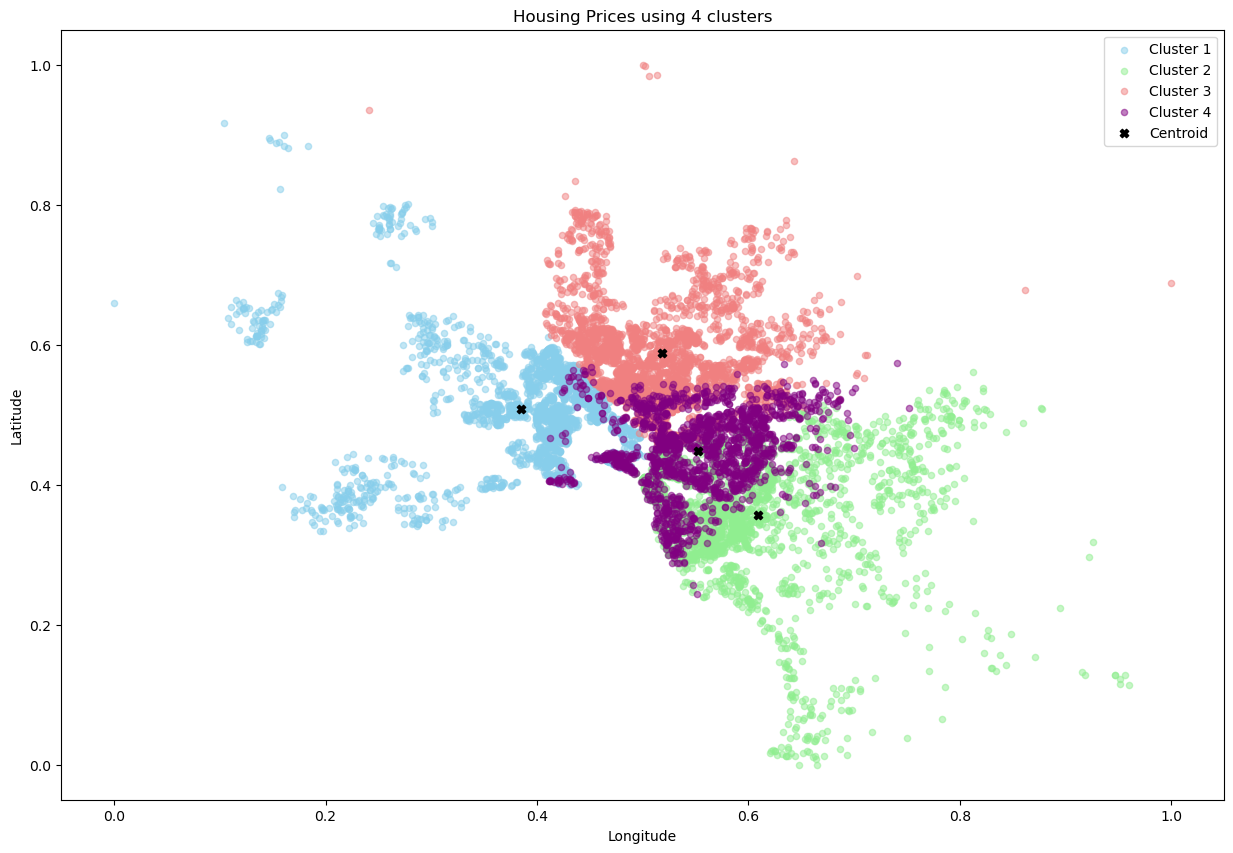

In [105]:
#Using scatter plot, we will plot 4 clusters at this point
plt.figure(figsize=(15, 10))

df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]

plt.scatter(df1['Longtitude'], df1['Lattitude'], c='skyblue', label='Cluster 1', alpha=0.5, s=20)
plt.scatter(df2['Longtitude'], df2['Lattitude'], c='lightgreen', label='Cluster 2', alpha=0.5, s=20)
plt.scatter(df3['Longtitude'], df3['Lattitude'], c='lightcoral', label='Cluster 3', alpha=0.5, s=20)
plt.scatter(df4['Longtitude'], df4['Lattitude'], c='purple', label='Cluster 4', alpha=0.5, s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X', label='Centroid')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Prices using 4 clusters')
plt.legend()
plt.show()

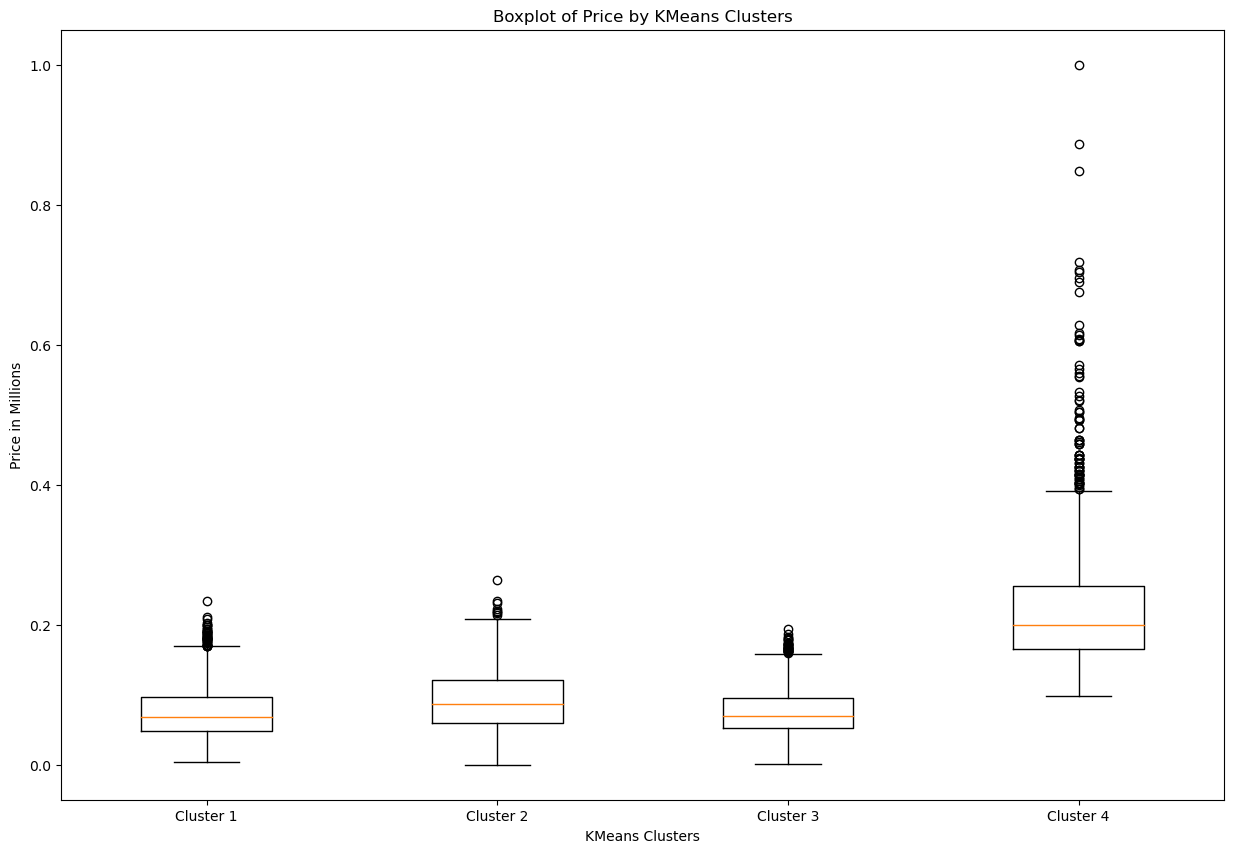

In [107]:
df['Price_Millions'] = df['Price'] / 1e6  # Dividing by 1 million to convert to millions

plt.figure(figsize=(15, 10))
plt.boxplot([df[df['Cluster'] == i]['Price'] for i in range(4)], labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.xlabel('KMeans Clusters')
plt.ylabel('Price in Millions')
plt.title('Boxplot of Price by KMeans Clusters')
plt.show()


Silhouette score using cluster = 4

In [51]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init='auto', init='random', max_iter=300)
cluster_labels_4 = kmeans_4.fit_predict(df[['Longtitude', 'Lattitude', 'Price']])

# Compute silhouette score for n_clusters=3
silhouette_avg_4 = silhouette_score(df[['Longtitude', 'Lattitude', 'Price']], cluster_labels_4)
print(f"Silhouette Score for KMeans with n_clusters=3: {silhouette_avg_4}")

Silhouette Score for KMeans with n_clusters=3: 0.27170693374714716
